### childHealth Exploration

In [30]:
import warnings

import numpy as np
import pandas as pd

from childHealth.config import ProjectConfig
from childHealth.data_processor import TrainDataProcessor

warnings.filterwarnings("ignore", category=FutureWarning)

In [31]:
# Specify dtypes for columns
dtypes = {
    "Basic_Demos-Age": "float64",
    "Basic_Demos-Sex": "float64",
    "CGAS-CGAS_Score": "float64",
    "Physical-BMI": "float64",
    "Physical-Height": "float64",
    "Physical-Weight": "float64",
    "Physical-Waist_Circumference": "float64",
    "Physical-Diastolic_BP": "float64",
    "Physical-HeartRate": "float64",
    "Physical-Systolic_BP": "float64",
    "Fitness_Endurance-Max_Stage": "float64",
    "Fitness_Endurance-Time_Mins": "float64",
    "Fitness_Endurance-Time_Sec": "float64",
    "FGC-FGC_CU": "float64",
    "FGC-FGC_CU_Zone": "float64",
    "FGC-FGC_GSND": "float64",
    "FGC-FGC_GSND_Zone": "float64",
    "FGC-FGC_GSD": "float64",
    "FGC-FGC_GSD_Zone": "float64",
    "FGC-FGC_PU": "float64",
    "FGC-FGC_PU_Zone": "float64",
    "FGC-FGC_SRL": "float64",
    "FGC-FGC_SRL_Zone": "float64",
    "FGC-FGC_SRR": "float64",
    "FGC-FGC_SRR_Zone": "float64",
    "FGC-FGC_TL": "float64",
    "FGC-FGC_TL_Zone": "float64",
    "BIA-BIA_Activity_Level_num": "float64",
    "BIA-BIA_BMC": "float64",
    "BIA-BIA_BMI": "float64",
    "BIA-BIA_BMR": "float64",
    "BIA-BIA_DEE": "float64",
    "BIA-BIA_ECW": "float64",
    "BIA-BIA_FFM": "float64",
    "BIA-BIA_FFMI": "float64",
    "BIA-BIA_FMI": "float64",
    "BIA-BIA_Fat": "float64",
    "BIA-BIA_Frame_num": "float64",
    "BIA-BIA_ICW": "float64",
    "BIA-BIA_LDM": "float64",
    "BIA-BIA_LST": "float64",
    "BIA-BIA_SMM": "float64",
    "BIA-BIA_TBW": "float64",
    "PAQ_A-PAQ_A_Total": "float64",
    "PAQ_C-PAQ_C_Total": "float64",
    "PCIAT-PCIAT_01": "float64",
    "PCIAT-PCIAT_02": "float64",
    "PCIAT-PCIAT_03": "float64",
    "PCIAT-PCIAT_04": "float64",
    "PCIAT-PCIAT_05": "float64",
    "PCIAT-PCIAT_06": "float64",
    "PCIAT-PCIAT_07": "float64",
    "PCIAT-PCIAT_08": "float64",
    "PCIAT-PCIAT_09": "float64",
    "PCIAT-PCIAT_10": "float64",
    "PCIAT-PCIAT_11": "float64",
    "PCIAT-PCIAT_12": "float64",
    "PCIAT-PCIAT_13": "float64",
    "PCIAT-PCIAT_14": "float64",
    "PCIAT-PCIAT_15": "float64",
    "PCIAT-PCIAT_16": "float64",
    "PCIAT-PCIAT_17": "float64",
    "PCIAT-PCIAT_18": "float64",
    "PCIAT-PCIAT_19": "float64",
    "PCIAT-PCIAT_20": "float64",
    "PCIAT-PCIAT_Total": "float64",
    "SDS-SDS_Total_Raw": "float64",
    "SDS-SDS_Total_T": "float64",
    "PreInt_EduHx-computerinternet_hoursday": "float64",
    "Basic_Demos-Enroll_Season": "object",
    "CGAS-Season": "object",
    "Physical-Season": "object",
    "Fitness_Endurance-Season": "object",
    "FGC-Season": "object",
    "BIA-Season": "object",
    "PAQ_A-Season": "object",
    "PAQ_C-Season": "object",
    "PCIAT-Season": "object",
    "SDS-Season": "object",
    "sii": "float64",
}

# Load data with specified dtypes
df = pd.read_csv("../../data/childHealth.csv", dtype=dtypes)

### Data Cleaning

In [32]:
pciat_min_max = df.groupby("sii")["PCIAT-PCIAT_Total"].agg(["min", "max"])
pciat_min_max = pciat_min_max.rename(columns={"min": "Minimum PCIAT total Score", "max": "Maximum total PCIAT Score"})
pciat_min_max

,Minimum PCIAT total Score,Maximum total PCIAT Score
sii,,
0.0,0.0,30.0
1.0,31.0,49.0
2.0,50.0,79.0
3.0,80.0,93.0


In [33]:
import re

# Example list of column names
columns = df.columns

# Regular expression patterns
pattern_pciat = re.compile(r"^PCIAT-PCIAT.*")
pattern_season = re.compile(r"^PCIAT-Season.*")

# Extract columns that match the patterns
pciat_columns = [col for col in columns if pattern_pciat.match(col)]
season_columns = [col for col in columns if pattern_season.match(col)]

# Combine the lists of columns
selected_columns = pciat_columns + season_columns

In [34]:
train_with_sii = df[df["sii"].notna()][selected_columns]
train_with_sii

,PCIAT-PCIAT_01,PCIAT-PCIAT_02,PCIAT-PCIAT_03,PCIAT-PCIAT_04,PCIAT-PCIAT_05,PCIAT-PCIAT_06,PCIAT-PCIAT_07,PCIAT-PCIAT_08,PCIAT-PCIAT_09,PCIAT-PCIAT_10,...,PCIAT-PCIAT_13,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,PCIAT-Season
0,5.0,4.0,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,...,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,55.0,Fall
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fall
2,5.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,...,1.0,1.0,1.0,0.0,2.0,2.0,1.0,1.0,28.0,Fall
3,4.0,2.0,4.0,0.0,5.0,1.0,0.0,3.0,2.0,2.0,...,3.0,0.0,0.0,3.0,4.0,3.0,4.0,1.0,44.0,Summer
5,3.0,3.0,3.0,0.0,2.0,1.0,0.0,2.0,2.0,1.0,...,3.0,3.0,2.0,1.0,3.0,1.0,2.0,1.0,34.0,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3953,3.0,3.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,2.0,0.0,0.0,3.0,0.0,2.0,2.0,1.0,22.0,Fall
3954,1.0,3.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,5.0,1.0,0.0,5.0,3.0,3.0,3.0,0.0,33.0,Summer
3955,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,2.0,1.0,...,2.0,0.0,1.0,0.0,2.0,1.0,1.0,0.0,32.0,Winter
3957,5.0,5.0,3.0,0.0,5.0,1.0,0.0,2.0,0.0,2.0,...,1.0,3.0,0.0,0.0,1.0,1.0,0.0,1.0,31.0,Winter


In [35]:
PCIAT_cols = [f"PCIAT-PCIAT_{i+1:02d}" for i in range(20)]

In [36]:
df["complete_resp_total"] = df["PCIAT-PCIAT_Total"].where(df[PCIAT_cols].notna().all(axis=1), np.nan)

sii_map = {0: "0 (None)", 1: "1 (Mild)", 2: "2 (Moderate)", 3: "3 (Severe)"}
df["sii"] = df["sii"].map(sii_map).fillna("Missing")

sii_order = ["Missing", "0 (None)", "1 (Mild)", "2 (Moderate)", "3 (Severe)"]
df["sii"] = pd.Categorical(df["sii"], categories=sii_order, ordered=True)

In [37]:
df["sii"].value_counts(dropna=False)

sii
0 (None)        1594
Missing         1224
1 (Mild)         730
2 (Moderate)     378
3 (Severe)        34
Name: count, dtype: int64

In [14]:
df["sii"]

0       Missing
1       Missing
2       Missing
3       Missing
4       Missing
         ...   
3955    Missing
3956    Missing
3957    Missing
3958    Missing
3959    Missing
Name: sii, Length: 3960, dtype: category
Categories (5, object): ['Missing' < '0' < '1' < '2' < '3']

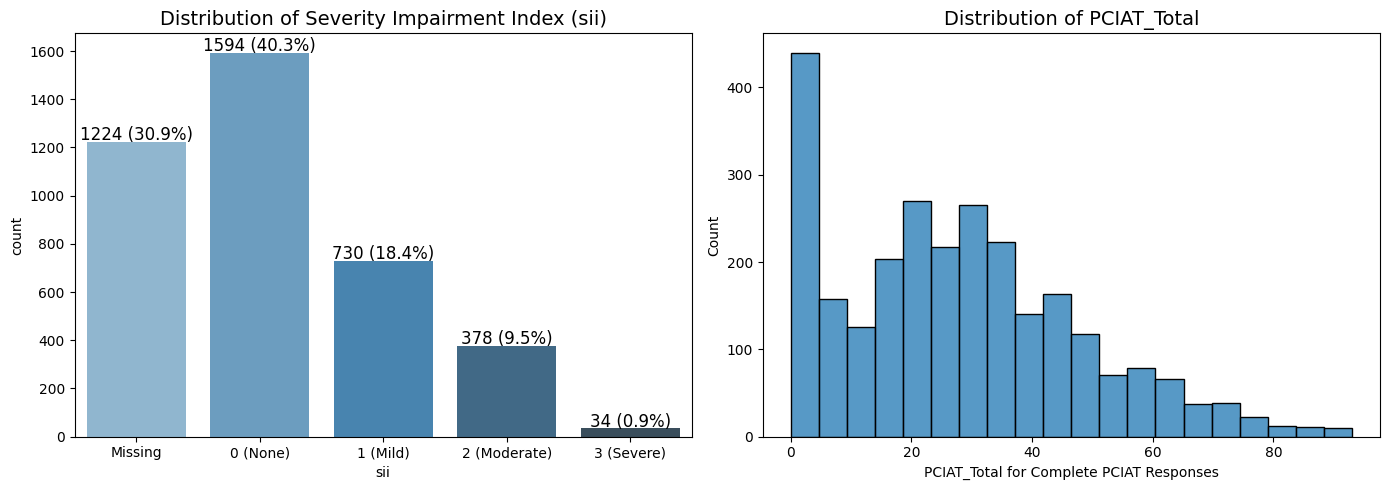

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sii_counts = df["sii"].value_counts().reset_index()
total = sii_counts["count"].sum()
sii_counts["percentage"] = (sii_counts["count"] / total) * 100

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# SII
sns.barplot(x="sii", y="count", data=sii_counts, palette="Blues_d", ax=axes[0])
axes[0].set_title("Distribution of Severity Impairment Index (sii)", fontsize=14)
for p in axes[0].patches:
    height = p.get_height()
    percentage = sii_counts.loc[sii_counts["count"] == height, "percentage"].values[0]
    axes[0].text(
        p.get_x() + p.get_width() / 2, height + 5, f"{int(height)} ({percentage:.1f}%)", ha="center", fontsize=12
    )

# PCIAT_Total for complete responses
sns.histplot(df["complete_resp_total"].dropna(), bins=20, ax=axes[1])
axes[1].set_title("Distribution of PCIAT_Total", fontsize=14)
axes[1].set_xlabel("PCIAT_Total for Complete PCIAT Responses")

plt.tight_layout()
plt.show()

## Data Cleaning Ends

In [3]:
# Load the project configuration
config = ProjectConfig.from_yaml(config_path="../../project_config.yml")

# Initialize the TrainDataProcessor with the DataFrame and configuration instance
preprocessor = TrainDataProcessor(train_df=df, config=config)

dff = preprocessor.process()

In [4]:
dff.head(5)

,Basic_Demos-Age,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,Fitness_Endurance-Max_Stage,...,CGAS-Season,Physical-Season,Fitness_Endurance-Season,FGC-Season,BIA-Season,PAQ_A-Season,PAQ_C-Season,PCIAT-Season,SDS-Season,sii
0,-1.520226,-0.827621,-0.549541,-1.522486e+00,-0.973630,2.681625e-15,-1.209035e-15,0.000000,-9.645525e-16,-1.018757e-15,...,Winter,Fall,Spring,Fall,Fall,Winter,Spring,Fall,Spring,2.0
1,-0.401093,0.000000,-1.185749,-1.216358e+00,-1.095847,-1.992136e+00,4.552580e-01,-0.980620,3.405206e-01,-1.018757e-15,...,Spring,Fall,Spring,Fall,Winter,Winter,Fall,Fall,Fall,0.0
2,-0.121310,0.317497,-0.600725,8.468847e-02,-0.342173,2.681625e-15,-3.955246e-01,1.048732,1.148855e-03,1.235014e-02,...,Fall,Fall,Fall,Fall,Summer,Winter,Summer,Fall,Fall,0.0
3,-0.401093,0.317497,-0.232743,8.156347e-03,-0.189402,2.681625e-15,-8.209160e-01,1.302401,1.148855e-03,1.159369e+00,...,Fall,Summer,Summer,Summer,Summer,Winter,Winter,Summer,Summer,1.0
4,2.116955,0.000000,0.000000,1.087587e-15,0.000000,2.681625e-15,-1.209035e-15,0.000000,-9.645525e-16,-1.018757e-15,...,Summer,Spring,Spring,Spring,Summer,Summer,Spring,Spring,Spring,4.0


#### MOdeling

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from childHealth.kappaLgm_model import ChildHealthModel

In [6]:
# Load the project configuration
config = ProjectConfig.from_yaml(config_path="../../project_config.yml")

X = dff[config.num_features + config.cat_features]
y = dff[config.target]

# Initialize the TrainDataProcessor with the DataFrame and configuration instance
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), config.num_features),
        ("cat", OneHotEncoder(drop="first"), config.cat_features),
    ]
)

# Initialize model class
child_health_model = ChildHealthModel(preprocessor, config)

# Split data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Train model
child_health_model.train(X_train, y_train, X_val, y_val)

# Out-of-Fold predictions for threshold optimization
oof_preds = child_health_model.predict_proba(X_test)
child_health_model.optimize_thresholds(y_test, oof_preds)

# Evaluate model
report, accuracy, kappa = child_health_model.evaluate(X_test, y_test)
print("Evaluation Results:")
print(report)
print("Accuracy:", accuracy)
print("Kappa Score:", kappa)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001322 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6016
[LightGBM] [Info] Number of data points in the train set: 2772, number of used features: 99
[LightGBM] [Info] Start training from score -0.909818
[LightGBM] [Info] Start training from score -1.690955
[LightGBM] [Info] Start training from score -2.351375
[LightGBM] [Info] Start training from score -4.749271
[LightGBM] [Info] Start training from score -1.173886
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


TypeError: loop of ufunc does not support argument 0 of type Dataset which has no callable rint method